In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
import numpy as np

import os
os.chdir("..")
%aimport AD_comparison_tools
%aimport AD_predictor_tools
%aimport ADpred_LambertTFs_helper

os.chdir("/Users/sanjanakotha/Desktop/Staller_Lab/consensus_predictor/notebooks/Yeast TFs")
import protfasta
import matplotlib.pyplot as plt
import seaborn as sns
import metapredict as meta
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D

sns.set_theme(rc={'figure.figsize':(6,4), 'figure.dpi' : 300})
sns.set_style("white")

In [3]:
# 1. Loading in predictor outputs on Lambert TFs
yeast_TFs = pd.read_csv("../../output/yeast_TF_seqs.csv", index_col = 0)
yeast_TFs = yeast_TFs.rename(columns = {"seq" : "sequence"})
yeast_TFs["uniprotID"] = yeast_TFs["id"].str.split("|").str[1]
yeast_TFs["length"] = yeast_TFs["sequence"].str.len()
yeast_TFs

,id,sequence,uniprotID,length
0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,MSDWDTNTIIGSRARAGGSGPRANVARSQGQINAARRQGLVVSVDK...,O14467,151
1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,MENTILHIHSFQLPQTEQPYPEAMLFDRDTSDSRTVLTQKPNGLEI...,O93958,291
2,sp|P03069|GCN4_YEAST General control transcrip...,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,P03069,281
3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,MKLLSSIEQACDICRLKKLKCSKEKPKCAKCLKNNWECRYSPKTKR...,P04386,881
4,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,MDYNKRSSVSTVPNAAPIRVGFVGLNAAKGWAIKTHYPAILQLSSQ...,P04387,435
...,...,...,...,...
242,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,MPSRTPTDIWRCQRLILAARKGETTCQALHEQSIEISSSLKWFEEI...,Q707Y3,176
243,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,MQFTILNEPSLDSQRREGDLASENYVFGDIRKEGVRILEDSLRSER...,Q707Y6,181
244,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...,Q708A1,122
245,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,MCDNDMADIQSKLSSFCEEIRALALKEGYNLEGDKSPSSKPYFMSW...,Q9HG12,228


In [5]:
# all_models["predictor"].value_counts()

In [41]:

adhunter = pd.read_csv("../../output/yeast_TFs_preds/cleaned/adhunter.csv", index_col=0)
adhunter["predictor"] = "adhunter"
adhunter
tada = pd.read_csv("../../output/yeast_TFs_preds/cleaned/tada.csv", index_col=0)
tada["predictor"] = "tada"
tada
adpred = pd.read_csv("../../output/yeast_TFs_preds/cleaned/adpred.csv", index_col=0)
adpred["predictor"] = "adpred"
adpred = adpred.rename(columns = {"GeneName" : "uniprotID"})
adpred
mechanistic = pd.read_csv("../../output/yeast_TFs_preds/cleaned/composition.csv", index_col=0)
mechanistic["predictor"] = "mechanistic"
mechanistic
paddle = pd.read_csv("../../output/yeast_TFs_preds/cleaned/paddle_noSS.csv", index_col=0)
paddle["predictor"] = "paddle"
paddle
all_models = pd.concat([adhunter, tada, adpred, mechanistic, paddle])
all_models
display(adhunter)
display(tada)
display(adpred)
display(mechanistic)
display(paddle)
display(all_models)

,uniprotID,Start,End,predictor
0,O93958,127,167,adhunter
1,O93958,186,291,adhunter
2,P03069,58,146,adhunter
3,P04386,134,210,adhunter
4,P04386,242,307,adhunter
...,...,...,...,...
447,Q12457,128,184,adhunter
448,Q12531,66,108,adhunter
449,Q707Y3,13,82,adhunter
450,Q707Y6,52,92,adhunter


,uniprotID,Start,End,predictor
0,O93958,192,290,tada
1,P03069,40,149,tada
2,P04386,135,207,tada
3,P04386,830,880,tada
4,P04387,364,410,tada
...,...,...,...,...
291,Q12363,49,94,tada
292,Q12457,129,180,tada
293,Q12753,272,337,tada
294,Q12753,651,694,tada


,uniprotID,Start,End,predictor
0,O93958,211,225,adpred
1,O93958,256,273,adpred
2,P03069,109,124,adpred
3,P04386,167,177,adpred
4,P04386,853,863,adpred
...,...,...,...,...
316,Q12340,360,374,adpred
317,Q12340,542,559,adpred
318,Q12340,752,780,adpred
319,Q707Y3,34,59,adpred


,uniprotID,Start,End,predictor
0,P33400,128,172,mechanistic
1,P33400,520,618,mechanistic
2,P13574,229,341,mechanistic
3,P53968,504,543,mechanistic
4,P21192,28,86,mechanistic
...,...,...,...,...
99,P38830,10,49,mechanistic
100,P14681,310,368,mechanistic
101,P32896,449,505,mechanistic
102,P26370,358,396,mechanistic


,uniprotID,Start,End,predictor
1,O93958,223,262,paddle
2,P03069,69,135,paddle
3,P04386,149,154,paddle
3,P04386,155,180,paddle
3,P04386,837,854,paddle
...,...,...,...,...
236,Q12363,317,339,paddle
236,Q12363,340,350,paddle
239,Q12457,143,175,paddle
241,Q12753,284,317,paddle


,uniprotID,Start,End,predictor
0,O93958,127,167,adhunter
1,O93958,186,291,adhunter
2,P03069,58,146,adhunter
3,P04386,134,210,adhunter
4,P04386,242,307,adhunter
...,...,...,...,...
236,Q12363,317,339,paddle
236,Q12363,340,350,paddle
239,Q12457,143,175,paddle
241,Q12753,284,317,paddle


In [43]:

def combine_intervals(uniprotID):
    all_models_rows = all_models[all_models["uniprotID"] == uniprotID]
    TF_length = yeast_TFs[yeast_TFs["uniprotID"] == uniprotID]["length"].iloc[0].astype(int)
    
    if len(all_models_rows) > 0:
        preds = []

        for i in range(len(all_models_rows)):
            row_preds = np.zeros(TF_length)
            row = all_models_rows.iloc[i]
            row_preds[row["Start"]:row["End"]] = 1
            preds.append(row_preds)

        all_models_rows["preds"] = preds

        return sum(all_models_rows["preds"]) / 5

    else:
        return np.zeros(TF_length)
        
yeast_TFs_with_preds = yeast_TFs[["uniprotID", "sequence"]]
yeast_TFs_with_preds["combined_preds"] = yeast_TFs_with_preds["uniprotID"].apply(lambda id: combine_intervals(id))
yeast_TFs_with_preds

,uniprotID,sequence,combined_preds
0,O14467,MSDWDTNTIIGSRARAGGSGPRANVARSQGQINAARRQGLVVSVDK...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,O93958,MENTILHIHSFQLPQTEQPYPEAMLFDRDTSDSRTVLTQKPNGLEI...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,P03069,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,P04386,MKLLSSIEQACDICRLKKLKCSKEKPKCAKCLKNNWECRYSPKTKR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,P04387,MDYNKRSSVSTVPNAAPIRVGFVGLNAAKGWAIKTHYPAILQLSSQ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
242,Q707Y3,MPSRTPTDIWRCQRLILAARKGETTCQALHEQSIEISSSLKWFEEI...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
243,Q707Y6,MQFTILNEPSLDSQRREGDLASENYVFGDIRKEGVRILEDSLRSER...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
244,Q708A1,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
245,Q9HG12,MCDNDMADIQSKLSSFCEEIRALALKEGYNLEGDKSPSSKPYFMSW...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [44]:
yeast_TFs_with_preds["len"] = yeast_TFs_with_preds["sequence"].str.len()
yeast_TFs_with_preds = yeast_TFs_with_preds.sort_values(by = 'len')
yeast_TFs_with_preds

,uniprotID,sequence,combined_preds,len
26,P11633,MAATKEAKQPKEPKKRTTRRKKDPNAPKRGLSAYMFFANENRDIVR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",99
23,P0CY12,MRSIENDRSNYQLTQKNKSADGLVFNVVTQDMINKSTKPYRGHRFT...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",119
24,P0CY13,MRSIENDRSNYQLTQKNKSADGLVFNVVTQDMINKSTKPYRGHRFT...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",119
134,P40569,MSTKLPIVISNGTAFKKVPVQLLLNSGSEAQHGLPRNADSQPARPR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",121
244,Q708A1,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",122
...,...,...,...,...
114,P39113,MANNNSDRQGLEPRVIRTLGSQALSGPSISNRTSSSEANPHFSKNV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1433
169,P53094,MPLLQPSTCFCYPLKLPPLPLTSDSNEFDECARKRLTLDYRTGSAV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1487
19,P0CE41,MSNTPYNSSVPSIASMTQSSVSRSPNMHTATTPGANTSSNSPPLHM...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1502
176,P53552,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1597


In [45]:
known_ADs = pd.read_excel("../../data/sanborn_known_ADs_elife-68068-fig1-data2-v3.xlsx")
known_ADs  = known_ADs.rename(columns = {"protein ID": "uniprotID", "start" : "Start", "stop" : "End"})
known_ADs

,protein,uniprotID,Start,End,maximal activation,maximal Z score,maximal fragment,sequence
0,GCN4,P03069,63,142,128.273405,11.910003,A_tiles_P03069:76,NLDFDFALPQTATAPDAKTVLPIPELDDAVVESFFSSSTDSTPMFE...
1,GAL4,P04386,832,880,44.019965,9.285866,A_tiles_P04386:828,SKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDTPPNPKK
2,GAL4,P04386,146,199,59.660889,10.031831,A_controls-mean_GAL4,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...
3,ARG81,P05085,194,256,32.070085,8.508774,A_tiles_P05085:194,KGHVKTGILSANDGVPPTPNLLDYDWNNLNITGYEWISSELRDDAL...
4,ARG81,P05085,69,126,13.391200,6.366012,A_tiles_P05085:65,IPQNSPATTTNLSGSVDEPQYQRRNIDFVRYDEEYVYHEDMDDELT...
...,...,...,...,...,...,...,...,...
145,YRM1,Q12340,737,785,73.486889,10.543228,A_tiles_Q12340:733,SENASHNNETGPIETELAQTISNEFWTAYNLGWEELMSQPDYKYLFDT
146,YRM1,Q12340,184,241,21.275056,7.501859,A_tiles_Q12340:193,PLEKTGSDILQQVCNVLPSFEQSSKIITDFFNTELETNEVSEVLDK...
147,HAA1,Q12753,658,693,35.587427,8.764113,A_tiles_Q12753:641,DLPDTSPMSSIQTASPPSQLLTDQGFADLDNFMSS
148,HAA1,Q12753,274,335,28.366703,8.207702,A_tiles_Q12753:282,NSRVGEVSVPLEEYIPSDIDGVGRVTDKSSLVYDWPFDESIERNFS...


In [46]:
known_ADs["charge"] = known_ADs["sequence"].str.count("R") +  known_ADs["sequence"].str.count("K") -  known_ADs["sequence"].str.count("D") -  known_ADs["sequence"].str.count("E")
known_ADs

,protein,uniprotID,Start,End,maximal activation,maximal Z score,maximal fragment,sequence,charge
0,GCN4,P03069,63,142,128.273405,11.910003,A_tiles_P03069:76,NLDFDFALPQTATAPDAKTVLPIPELDDAVVESFFSSSTDSTPMFE...,-15
1,GAL4,P04386,832,880,44.019965,9.285866,A_tiles_P04386:828,SKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDTPPNPKK,-4
2,GAL4,P04386,146,199,59.660889,10.031831,A_controls-mean_GAL4,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,-10
3,ARG81,P05085,194,256,32.070085,8.508774,A_tiles_P05085:194,KGHVKTGILSANDGVPPTPNLLDYDWNNLNITGYEWISSELRDDAL...,-4
4,ARG81,P05085,69,126,13.391200,6.366012,A_tiles_P05085:65,IPQNSPATTTNLSGSVDEPQYQRRNIDFVRYDEEYVYHEDMDDELT...,-8
...,...,...,...,...,...,...,...,...,...
145,YRM1,Q12340,737,785,73.486889,10.543228,A_tiles_Q12340:733,SENASHNNETGPIETELAQTISNEFWTAYNLGWEELMSQPDYKYLFDT,-8
146,YRM1,Q12340,184,241,21.275056,7.501859,A_tiles_Q12340:193,PLEKTGSDILQQVCNVLPSFEQSSKIITDFFNTELETNEVSEVLDK...,-6
147,HAA1,Q12753,658,693,35.587427,8.764113,A_tiles_Q12753:641,DLPDTSPMSSIQTASPPSQLLTDQGFADLDNFMSS,-5
148,HAA1,Q12753,274,335,28.366703,8.207702,A_tiles_Q12753:282,NSRVGEVSVPLEEYIPSDIDGVGRVTDKSSLVYDWPFDESIERNFS...,-7


In [47]:
acidic_known_ADs = known_ADs[known_ADs["charge"] < -3]
acidic_known_ADs

,protein,uniprotID,Start,End,maximal activation,maximal Z score,maximal fragment,sequence,charge
0,GCN4,P03069,63,142,128.273405,11.910003,A_tiles_P03069:76,NLDFDFALPQTATAPDAKTVLPIPELDDAVVESFFSSSTDSTPMFE...,-15
1,GAL4,P04386,832,880,44.019965,9.285866,A_tiles_P04386:828,SKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDTPPNPKK,-4
2,GAL4,P04386,146,199,59.660889,10.031831,A_controls-mean_GAL4,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,-10
3,ARG81,P05085,194,256,32.070085,8.508774,A_tiles_P05085:194,KGHVKTGILSANDGVPPTPNLLDYDWNNLNITGYEWISSELRDDAL...,-4
4,ARG81,P05085,69,126,13.391200,6.366012,A_tiles_P05085:65,IPQNSPATTTNLSGSVDEPQYQRRNIDFVRYDEEYVYHEDMDDELT...,-8
...,...,...,...,...,...,...,...,...,...
144,YLL054C,Q12244,777,842,108.571140,11.500851,A_tiles_Q12244:790,SLDLEILEELEKLISAQEFSRNFTEDVDESLQSEIDLMNYDNEALN...,-13
145,YRM1,Q12340,737,785,73.486889,10.543228,A_tiles_Q12340:733,SENASHNNETGPIETELAQTISNEFWTAYNLGWEELMSQPDYKYLFDT,-8
146,YRM1,Q12340,184,241,21.275056,7.501859,A_tiles_Q12340:193,PLEKTGSDILQQVCNVLPSFEQSSKIITDFFNTELETNEVSEVLDK...,-6
147,HAA1,Q12753,658,693,35.587427,8.764113,A_tiles_Q12753:641,DLPDTSPMSSIQTASPPSQLLTDQGFADLDNFMSS,-5


In [48]:
def combine_known_intervals(uniprotID):
    known_ADs_rows = known_ADs[known_ADs["uniprotID"] == uniprotID]
    TF_length = yeast_TFs[yeast_TFs["uniprotID"] == uniprotID]["length"].iloc[0].astype(int)
    
    if len(known_ADs_rows) > 0:
        annots = []

        for i in range(len(known_ADs_rows)):
            row_annots = np.zeros(TF_length)
            row = known_ADs_rows.iloc[i]
            row_annots[row["Start"]:row["End"]] = 1
            annots.append(row_annots)

        known_ADs_rows["annots"] = annots

        return np.array(sum(known_ADs_rows["annots"]))

    else:
        return np.zeros(TF_length)
        

In [49]:
yeast_TFs_with_preds["combined_annots"] = yeast_TFs_with_preds["uniprotID"].apply(lambda id: combine_known_intervals(id))
yeast_TFs_with_preds

,uniprotID,sequence,combined_preds,len,combined_annots
26,P11633,MAATKEAKQPKEPKKRTTRRKKDPNAPKRGLSAYMFFANENRDIVR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",99,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
23,P0CY12,MRSIENDRSNYQLTQKNKSADGLVFNVVTQDMINKSTKPYRGHRFT...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",119,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
24,P0CY13,MRSIENDRSNYQLTQKNKSADGLVFNVVTQDMINKSTKPYRGHRFT...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",119,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
134,P40569,MSTKLPIVISNGTAFKKVPVQLLLNSGSEAQHGLPRNADSQPARPR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",121,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
244,Q708A1,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
114,P39113,MANNNSDRQGLEPRVIRTLGSQALSGPSISNRTSSSEANPHFSKNV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1433,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
169,P53094,MPLLQPSTCFCYPLKLPPLPLTSDSNEFDECARKRLTLDYRTGSAV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1487,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19,P0CE41,MSNTPYNSSVPSIASMTQSSVSRSPNMHTATTPGANTSSNSPPLHM...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1502,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
176,P53552,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1597,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [50]:
acidic_activator_TFs = yeast_TFs_with_preds[yeast_TFs_with_preds["uniprotID"].isin(acidic_known_ADs["uniprotID"])]
acidic_activator_TFs

,uniprotID,sequence,combined_preds,len,combined_annots
40,P15315,MVVINGVKYACETCIRGHRAAQCTHTDGPLQMIRRKGRPSTTCGHC...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",225,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
142,P41546,MEMTDFELTSNSQSNLAIPTNFKSTLPPRKRAKTKEEKEQRRIERI...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",238,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52,P21705,MDESVDPVELLLRLLIRHKPHLKPYAYRQDSWQRVLDEYNRQTGSR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",255,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,P03069,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",281,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
78,P33122,MNSILDRNVRSSETTLIKPESEFDNWLSDENDGASHINVNKDSSSV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
206,Q04545,MSSEEFKGLPIKRDISSTIYADRPPALSAPPCVGATGNDKIQVLPI...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1251,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,P07248,MANVEKPNDCSGFPVVDLNSCFSNGFNNEKQEIEMETDDSPILLMS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, ...",1323,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
158,P46974,MEPFAFGRGAPALCILTAAARINLDNFVPCCWALFRLSFFFPLDPA...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1380,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
114,P39113,MANNNSDRQGLEPRVIRTLGSQALSGPSISNRTSSSEANPHFSKNV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1433,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Visualization

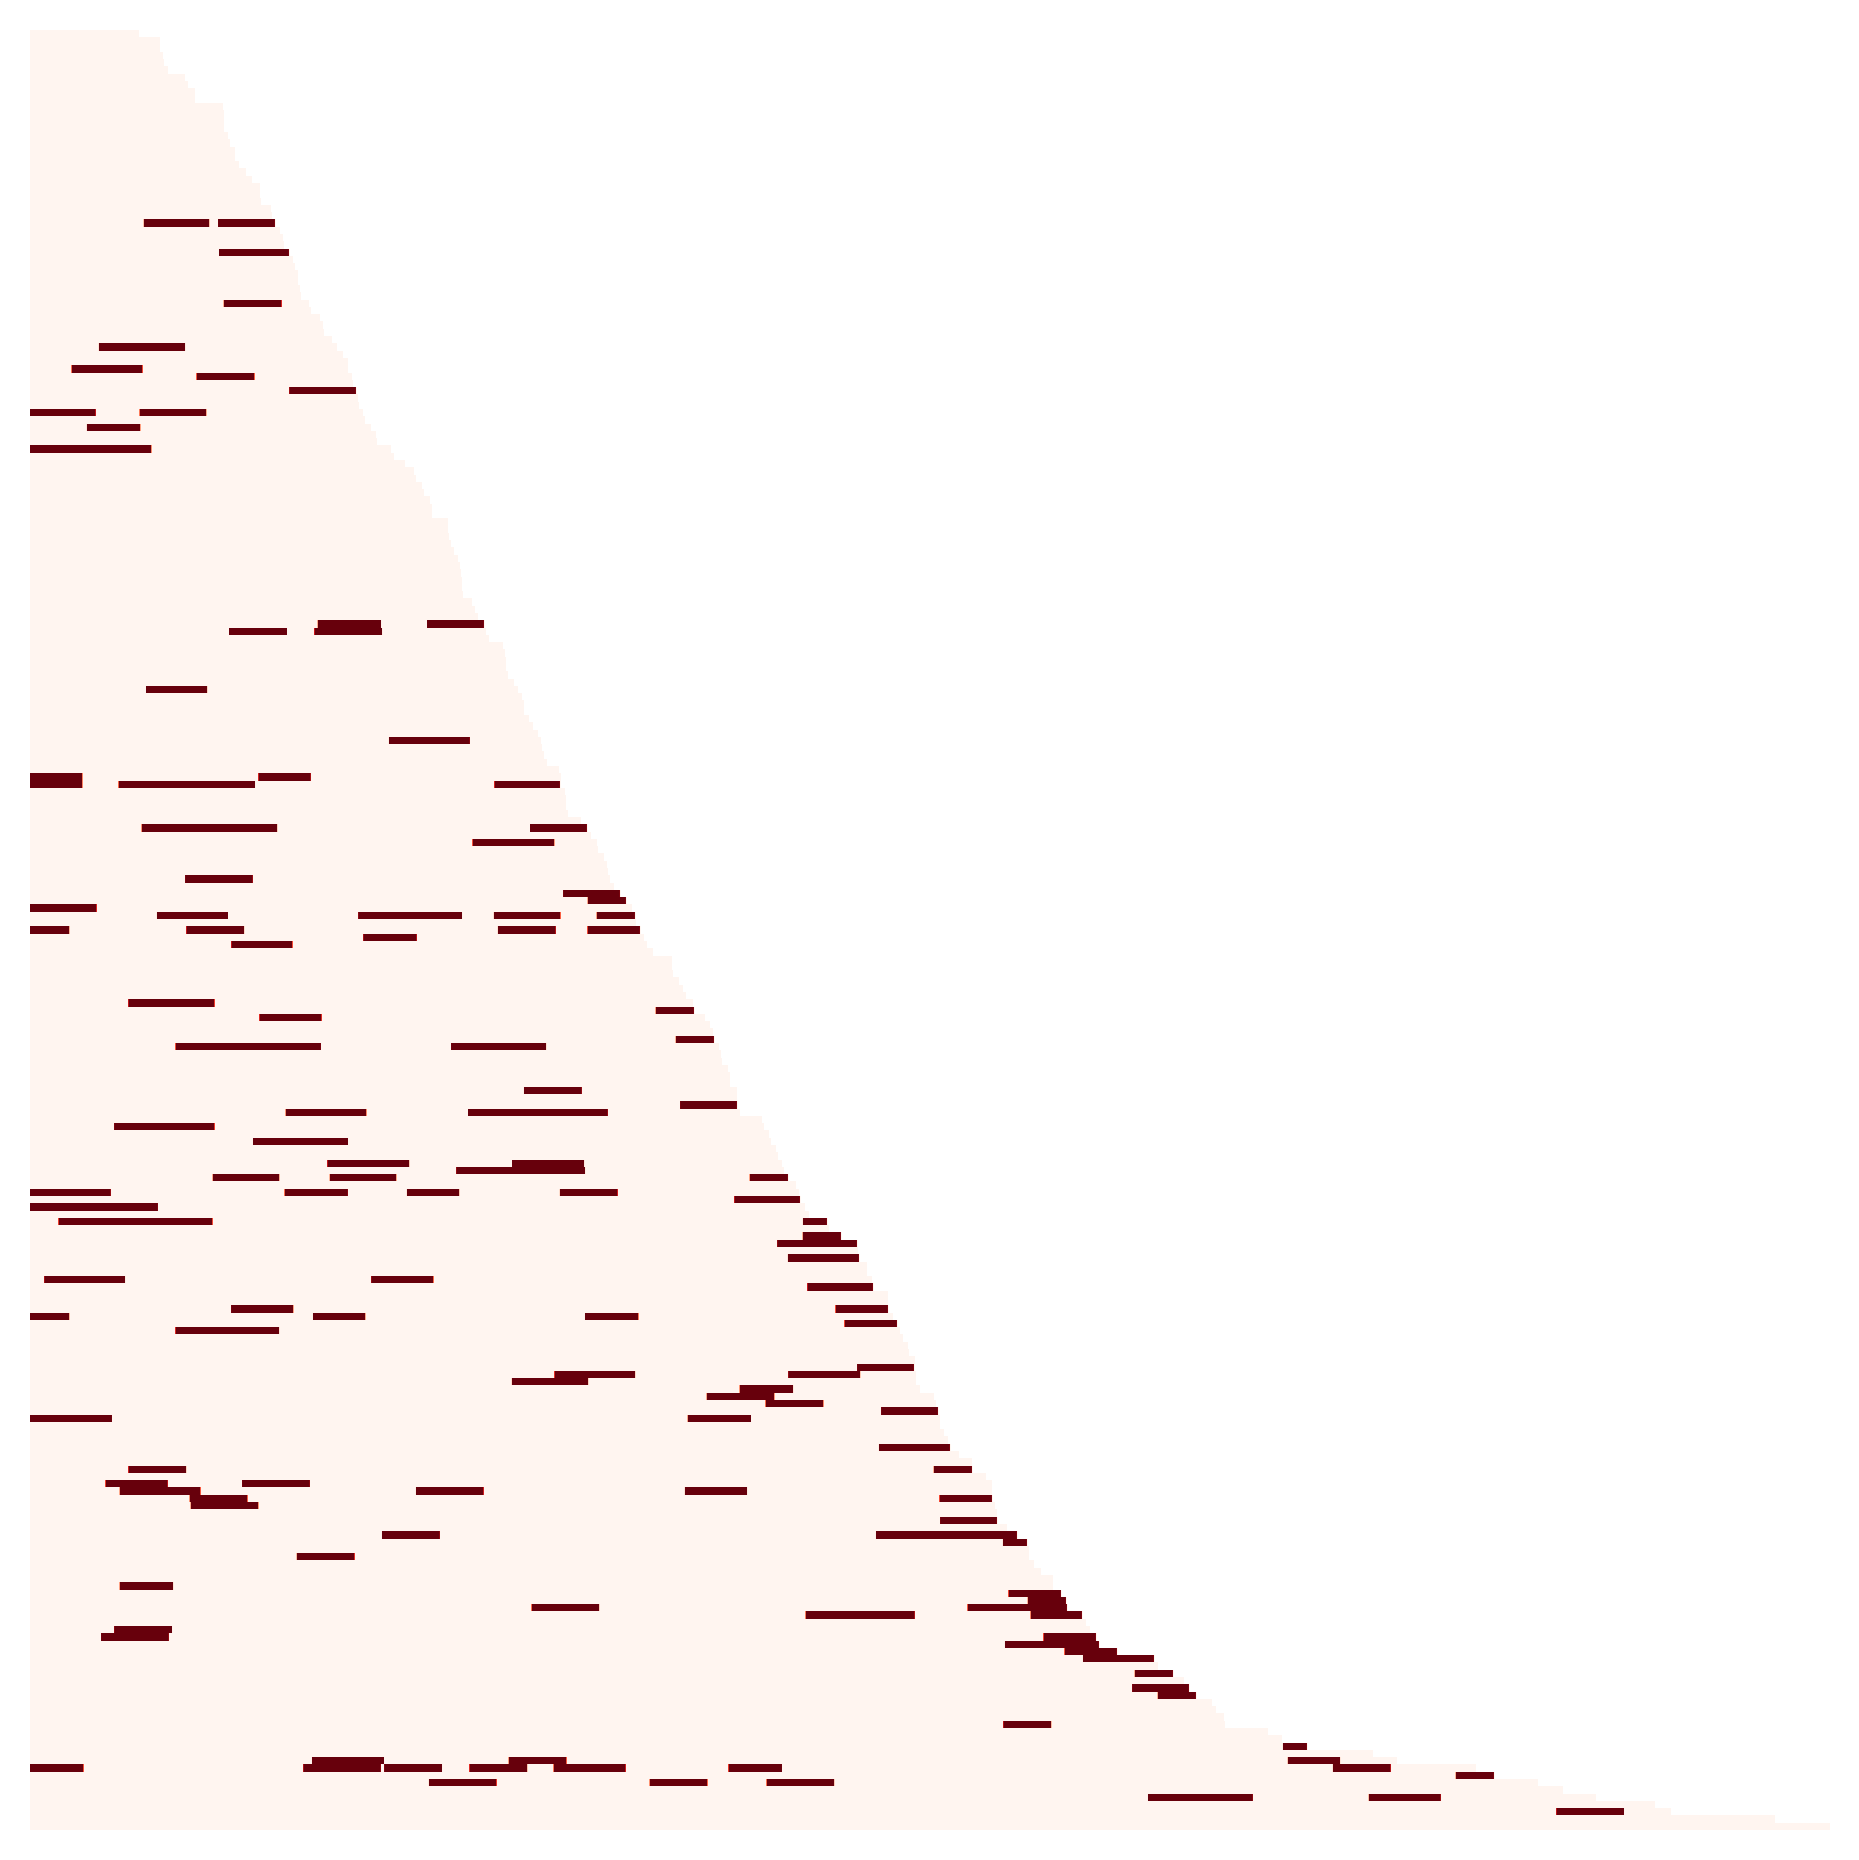

In [51]:
# Example DataFrame with a column of lists
# df = pd.DataFrame({
#     'data': [
#         [1, 2, 3],
#         [4, 5, 6],
#         [7, 8, 9]
#     ]
# })


# Extract the column of lists
data = yeast_TFs_with_preds['combined_annots'].tolist()

# # Find the maximum length of the lists
# max_len = max(len(row) for row in data)

# # Pad each list with np.nan (or 0) to make them all the same length
# padded_data = np.array([np.concatenate([row, [np.nan] * (max_len - len(row))]) for row in data])

fig,axs = plt.subplots(len(yeast_TFs_with_preds), 1, figsize = (6,6), sharex = True)
for i in range(len(axs)):
    ax = axs[i]
    # Use imshow to visualize
    axs[i].imshow(data[i][np.newaxis, :], cmap='Reds', aspect='auto', extent=[0, len(data[i]), 0, 1])  # or 'gray', 'hot', etc.
    axs[i].set_xlabel("")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    #a.colorbar()
    #plt.title('imshow of df column')
    #plt.show()

sns.despine(left = True, bottom = True)
plt.tight_layout(pad = 0)

In [52]:
yeast_TFs_with_preds

,uniprotID,sequence,combined_preds,len,combined_annots
26,P11633,MAATKEAKQPKEPKKRTTRRKKDPNAPKRGLSAYMFFANENRDIVR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",99,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
23,P0CY12,MRSIENDRSNYQLTQKNKSADGLVFNVVTQDMINKSTKPYRGHRFT...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",119,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
24,P0CY13,MRSIENDRSNYQLTQKNKSADGLVFNVVTQDMINKSTKPYRGHRFT...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",119,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
134,P40569,MSTKLPIVISNGTAFKKVPVQLLLNSGSEAQHGLPRNADSQPARPR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",121,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
244,Q708A1,MNVQEIHNIREACITILSGTKHNSVLFEPCDKFDEVINSLDIDPDS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
114,P39113,MANNNSDRQGLEPRVIRTLGSQALSGPSISNRTSSSEANPHFSKNV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1433,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
169,P53094,MPLLQPSTCFCYPLKLPPLPLTSDSNEFDECARKRLTLDYRTGSAV...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1487,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19,P0CE41,MSNTPYNSSVPSIASMTQSSVSRSPNMHTATTPGANTSSNSPPLHM...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1502,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
176,P53552,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1597,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [53]:
known_ADs

,protein,uniprotID,Start,End,maximal activation,maximal Z score,maximal fragment,sequence,charge
0,GCN4,P03069,63,142,128.273405,11.910003,A_tiles_P03069:76,NLDFDFALPQTATAPDAKTVLPIPELDDAVVESFFSSSTDSTPMFE...,-15
1,GAL4,P04386,832,880,44.019965,9.285866,A_tiles_P04386:828,SKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDTPPNPKK,-4
2,GAL4,P04386,146,199,59.660889,10.031831,A_controls-mean_GAL4,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,-10
3,ARG81,P05085,194,256,32.070085,8.508774,A_tiles_P05085:194,KGHVKTGILSANDGVPPTPNLLDYDWNNLNITGYEWISSELRDDAL...,-4
4,ARG81,P05085,69,126,13.391200,6.366012,A_tiles_P05085:65,IPQNSPATTTNLSGSVDEPQYQRRNIDFVRYDEEYVYHEDMDDELT...,-8
...,...,...,...,...,...,...,...,...,...
145,YRM1,Q12340,737,785,73.486889,10.543228,A_tiles_Q12340:733,SENASHNNETGPIETELAQTISNEFWTAYNLGWEELMSQPDYKYLFDT,-8
146,YRM1,Q12340,184,241,21.275056,7.501859,A_tiles_Q12340:193,PLEKTGSDILQQVCNVLPSFEQSSKIITDFFNTELETNEVSEVLDK...,-6
147,HAA1,Q12753,658,693,35.587427,8.764113,A_tiles_Q12753:641,DLPDTSPMSSIQTASPPSQLLTDQGFADLDNFMSS,-5
148,HAA1,Q12753,274,335,28.366703,8.207702,A_tiles_Q12753:282,NSRVGEVSVPLEEYIPSDIDGVGRVTDKSSLVYDWPFDESIERNFS...,-7


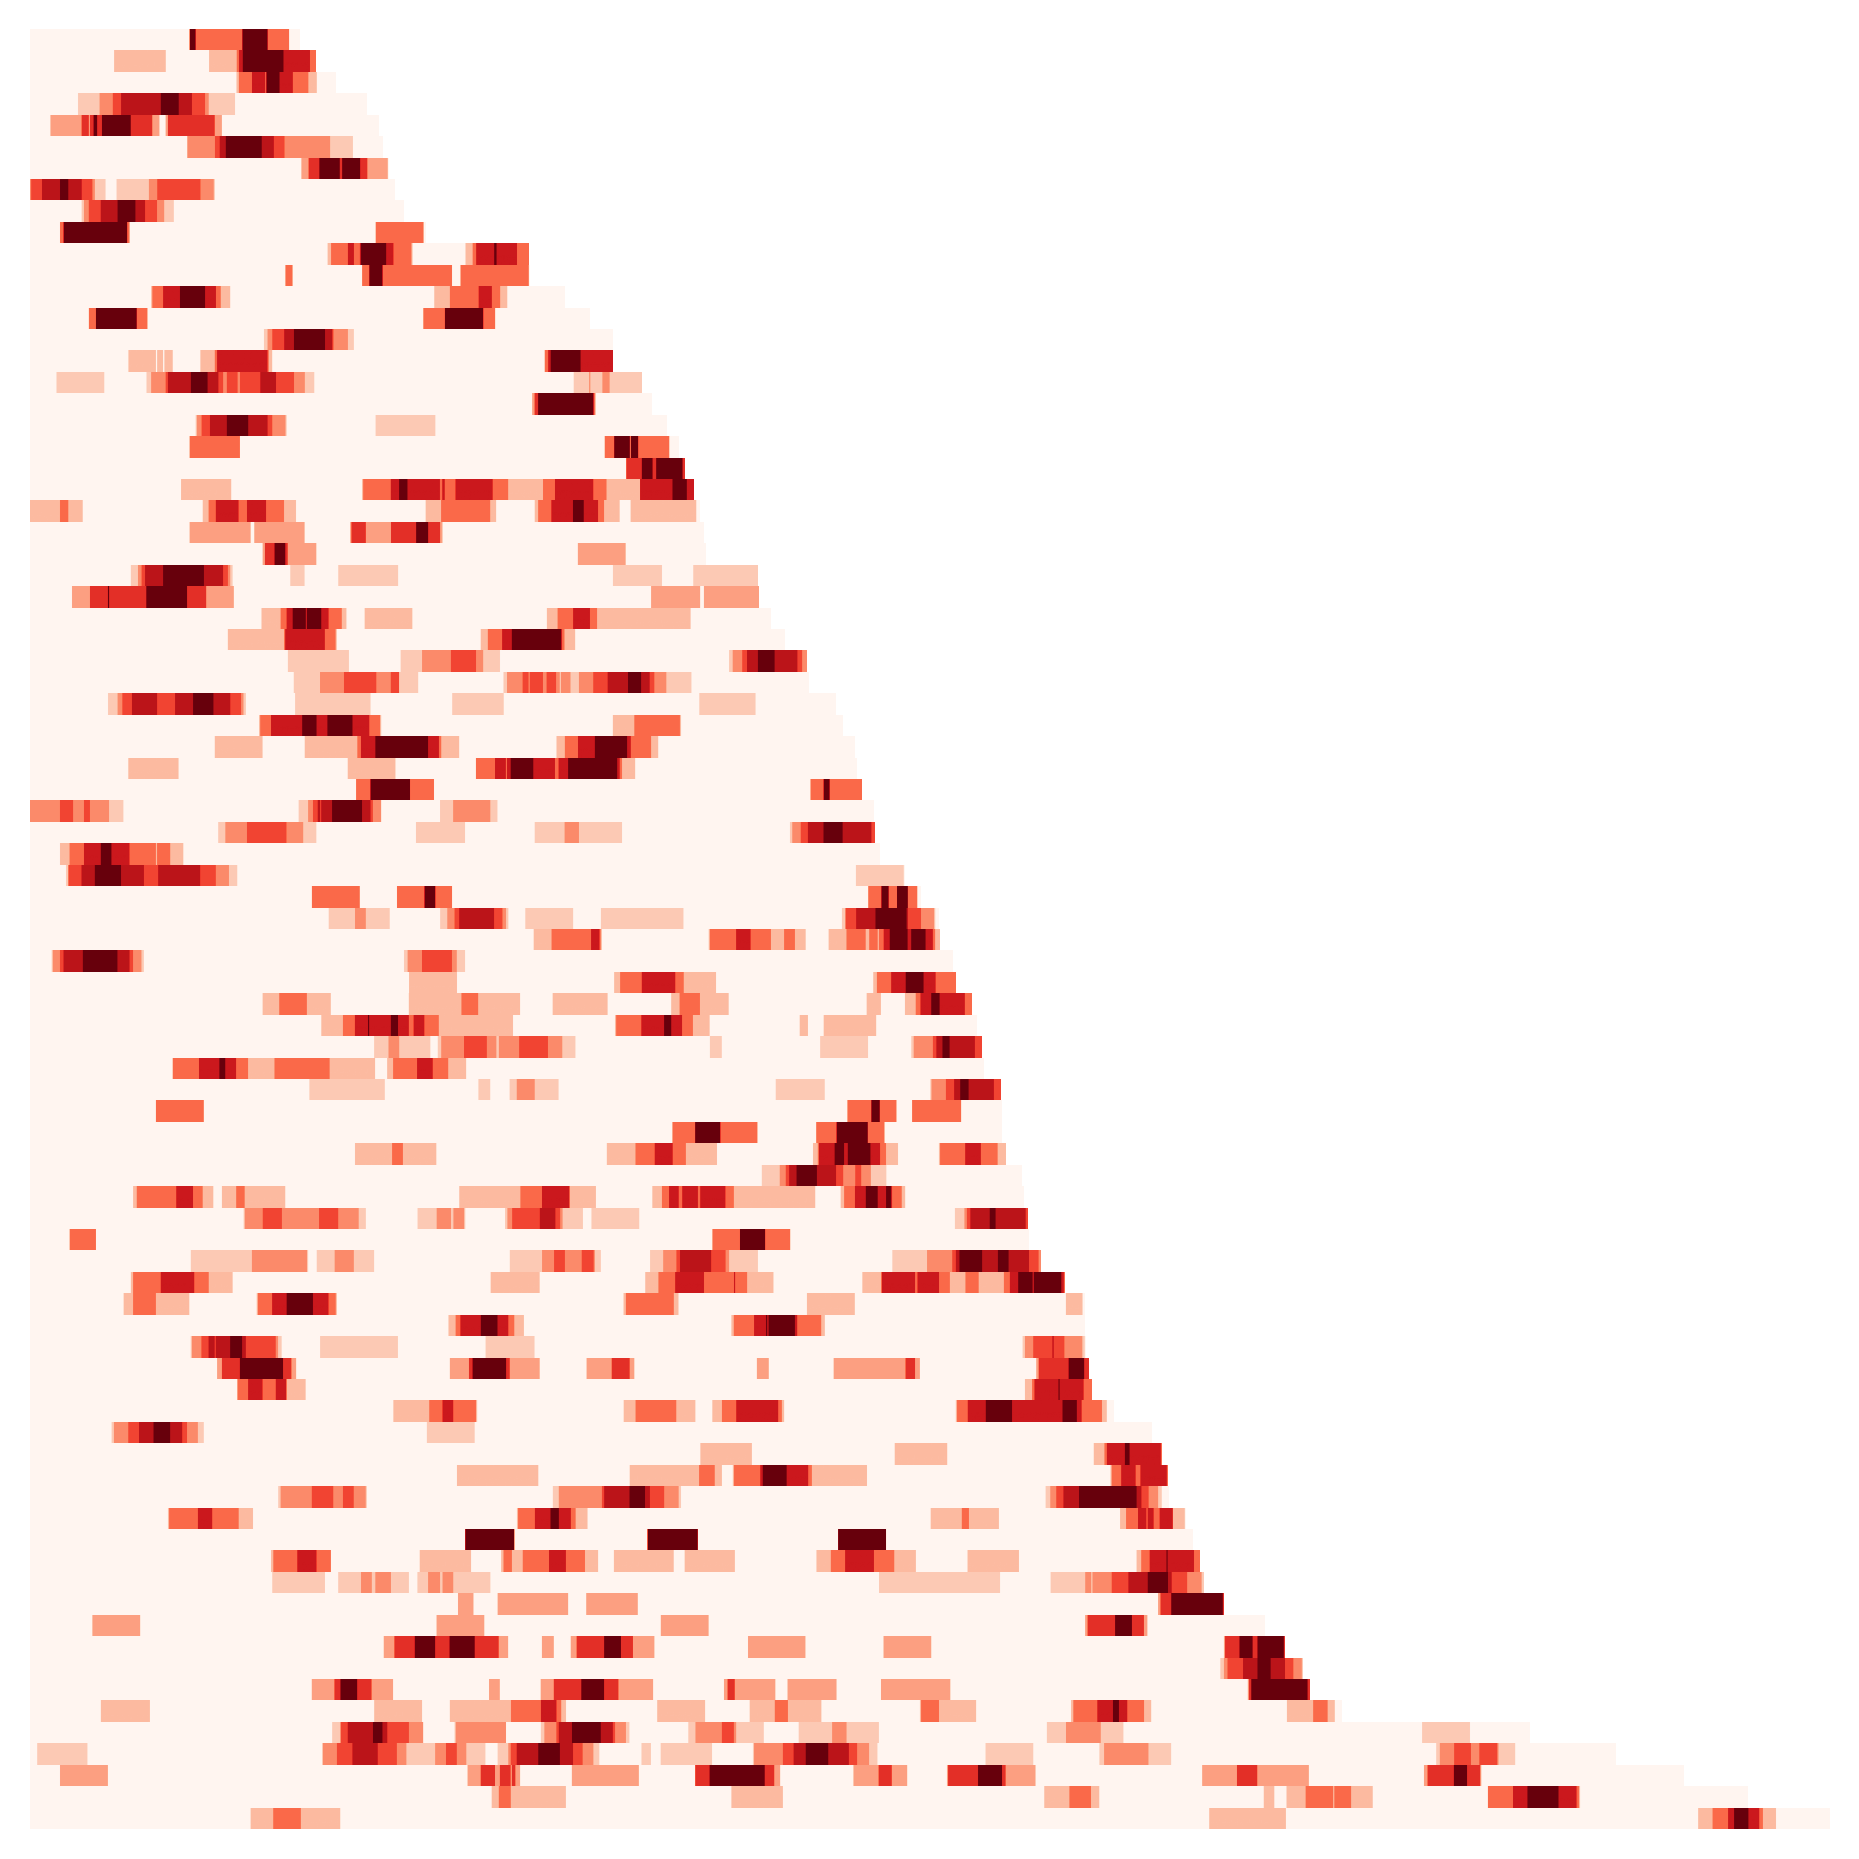

In [72]:
import matplotlib.patches as patches

# Example DataFrame with a column of lists
# df = pd.DataFrame({
#     'data': [
#         [1, 2, 3],
#         [4, 5, 6],
#         [7, 8, 9]
#     ]
# })


# Extract the column of lists
data = acidic_activator_TFs['combined_preds'].tolist()

# # Find the maximum length of the lists
# max_len = max(len(row) for row in data)

# # Pad each list with np.nan (or 0) to make them all the same length
# padded_data = np.array([np.concatenate([row, [np.nan] * (max_len - len(row))]) for row in data])

fig,axs = plt.subplots(len(acidic_activator_TFs), 1, figsize = (6,6), sharex = True)



for i in range(len(axs)):
    uniprotID = acidic_activator_TFs["uniprotID"].iloc[i]

    ax = axs[i]
    # Use imshow to visualize
    axs[i].imshow(data[i][np.newaxis, :], cmap='Reds', aspect='auto', extent=[0, len(data[i]), 0, 1])  # or 'gray', 'hot', etc.
    axs[i].set_xlabel("")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    #a.colorbar()
    #plt.title('imshow of df column')
    #plt.show()

    # AD_rows = known_ADs[known_ADs["uniprotID"] == uniprotID]
    #     # Add rectangle(s) for each interval
    # for (start, end) in zip(AD_rows["Start"], AD_rows["End"]):
    #     width = end - start
    #     rect = patches.Rectangle(
    #         (start, 0),  # (x, y) lower-left corner
    #         width,
    #         1,  # height
    #         linewidth=0.75,
    #         edgecolor='limegreen',
    #         facecolor='none'
    #     )
    #     ax.add_patch(rect)

sns.despine(left = True, bottom = True)
plt.tight_layout(pad = 0)

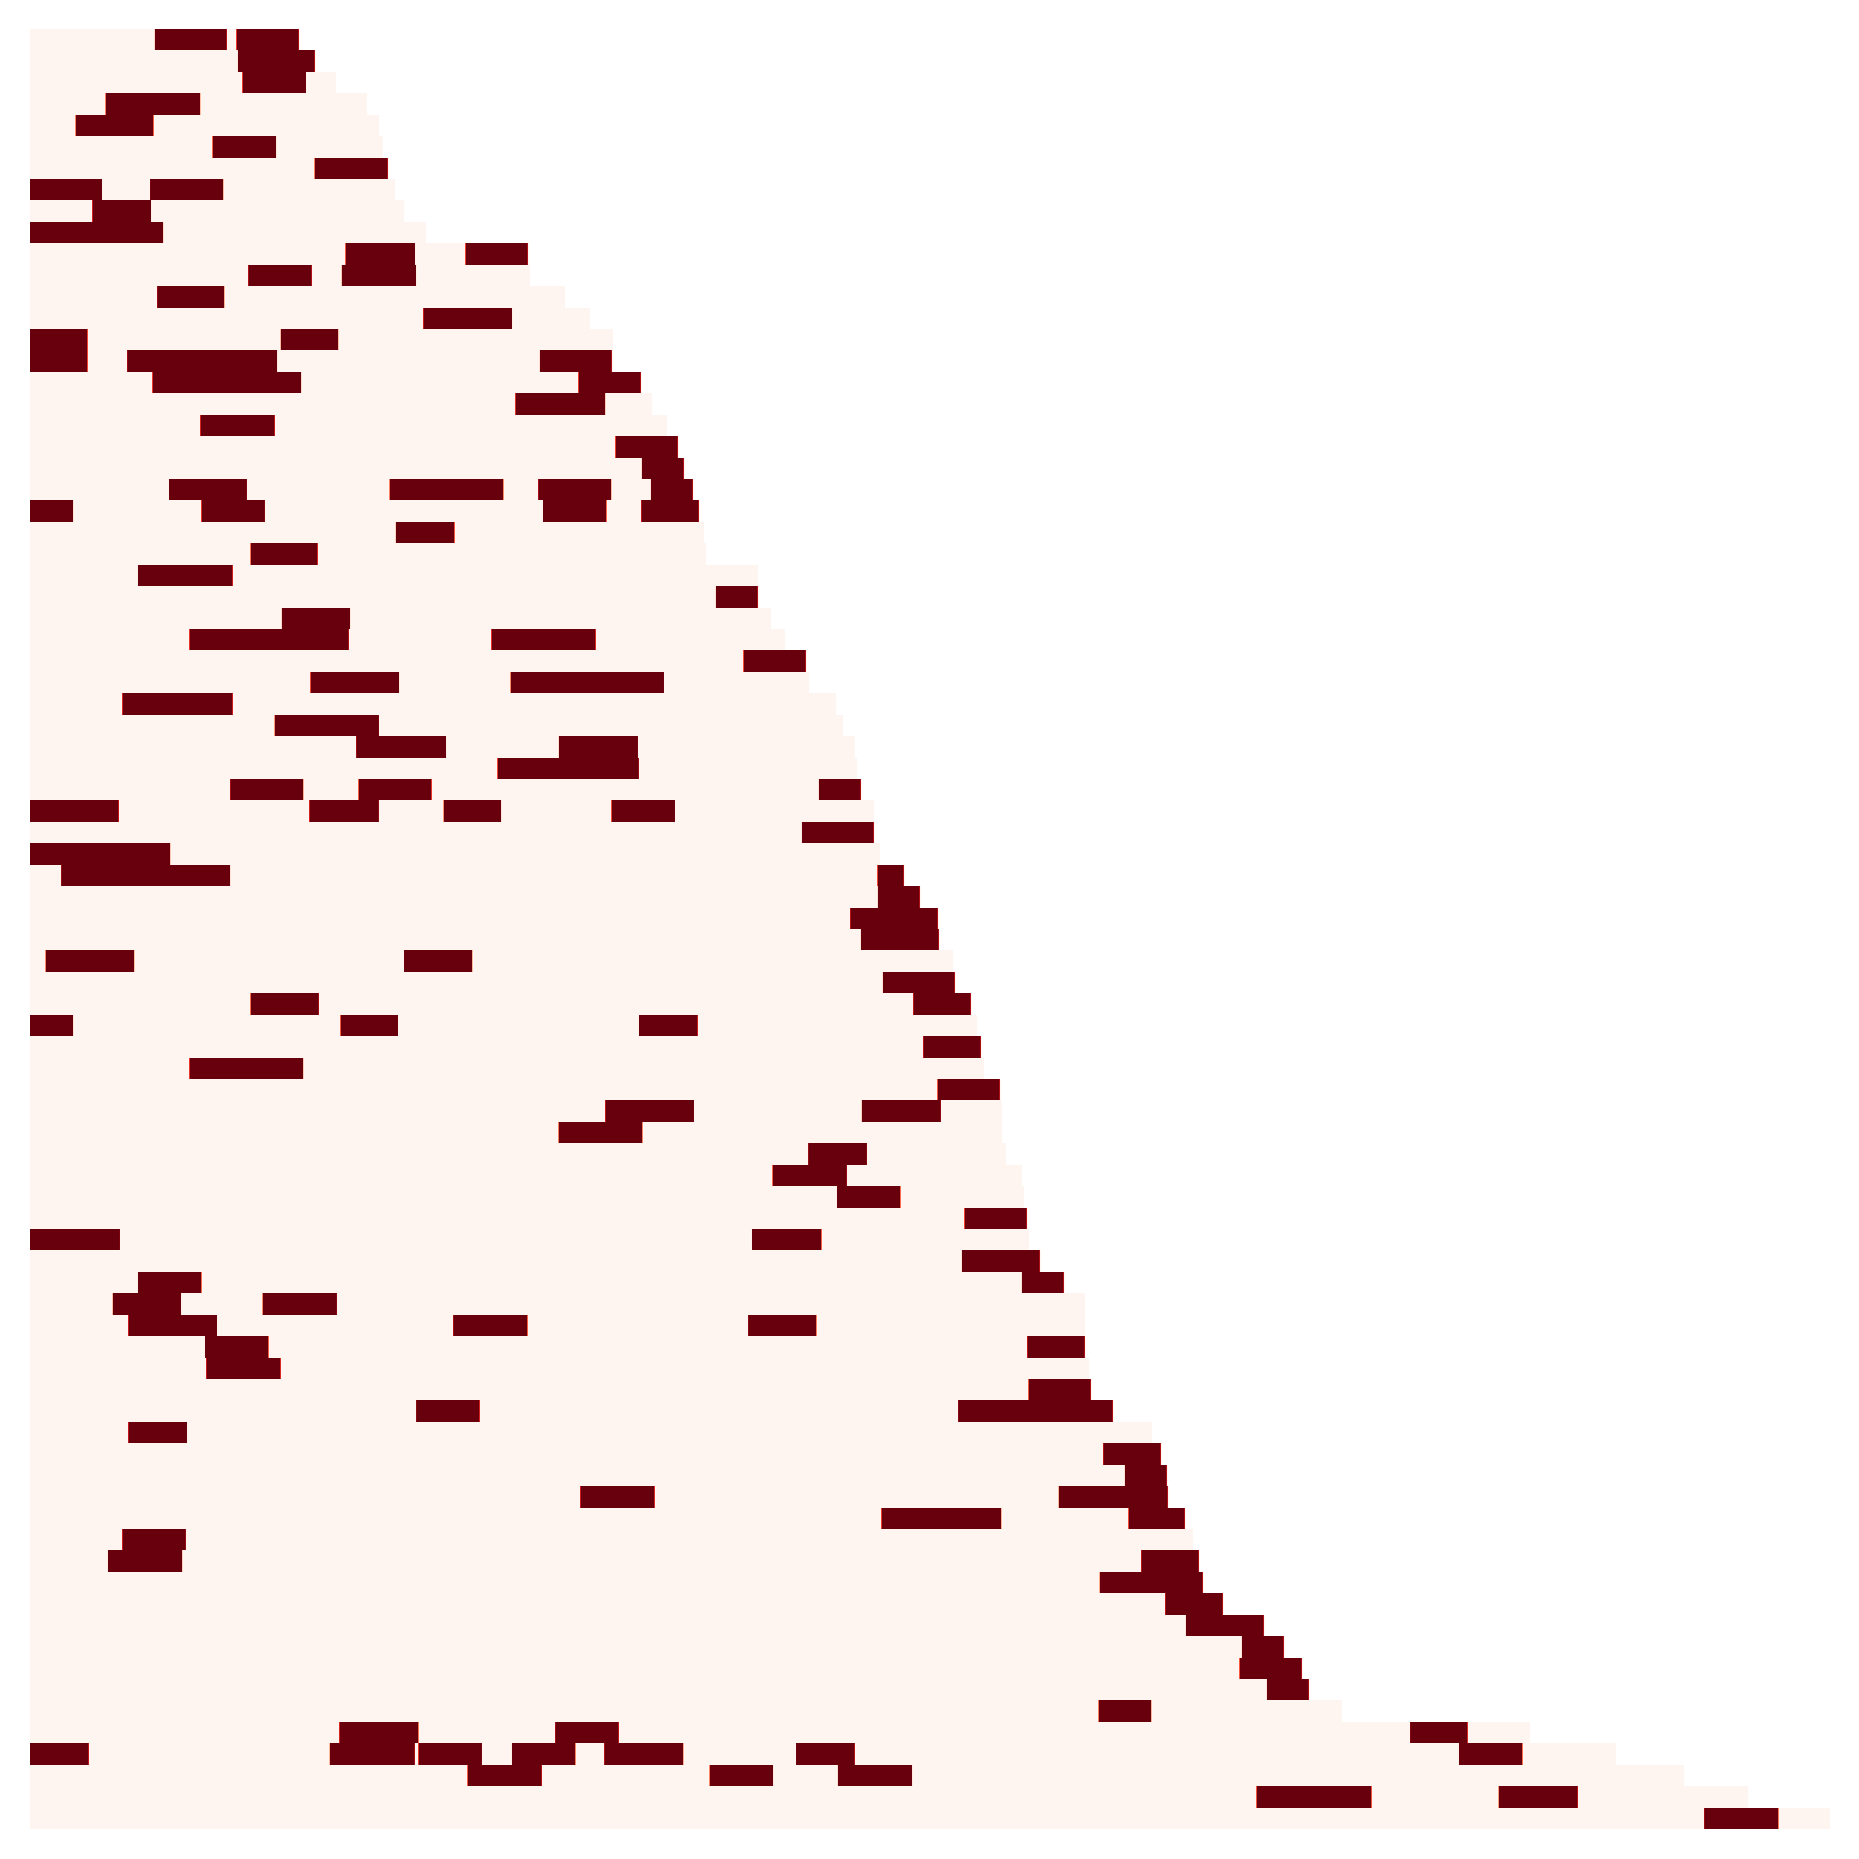

In [55]:
# Example DataFrame with a column of lists
# df = pd.DataFrame({
#     'data': [
#         [1, 2, 3],
#         [4, 5, 6],
#         [7, 8, 9]
#     ]
# })


# Extract the column of lists
data = acidic_activator_TFs['combined_annots'].tolist()

# # Find the maximum length of the lists
# max_len = max(len(row) for row in data)

# # Pad each list with np.nan (or 0) to make them all the same length
# padded_data = np.array([np.concatenate([row, [np.nan] * (max_len - len(row))]) for row in data])

fig,axs = plt.subplots(len(acidic_activator_TFs), 1, figsize = (6,6), sharex = True)
for i in range(len(axs)):
    ax = axs[i]
    # Use imshow to visualize
    axs[i].imshow(data[i][np.newaxis, :], cmap='Reds', aspect='auto', extent=[0, len(data[i]), 0, 1])  # or 'gray', 'hot', etc.
    axs[i].set_xlabel("")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    #a.colorbar()
    #plt.title('imshow of df column')
    #plt.show()

sns.despine(left = True, bottom = True)
plt.tight_layout(pad = 0)

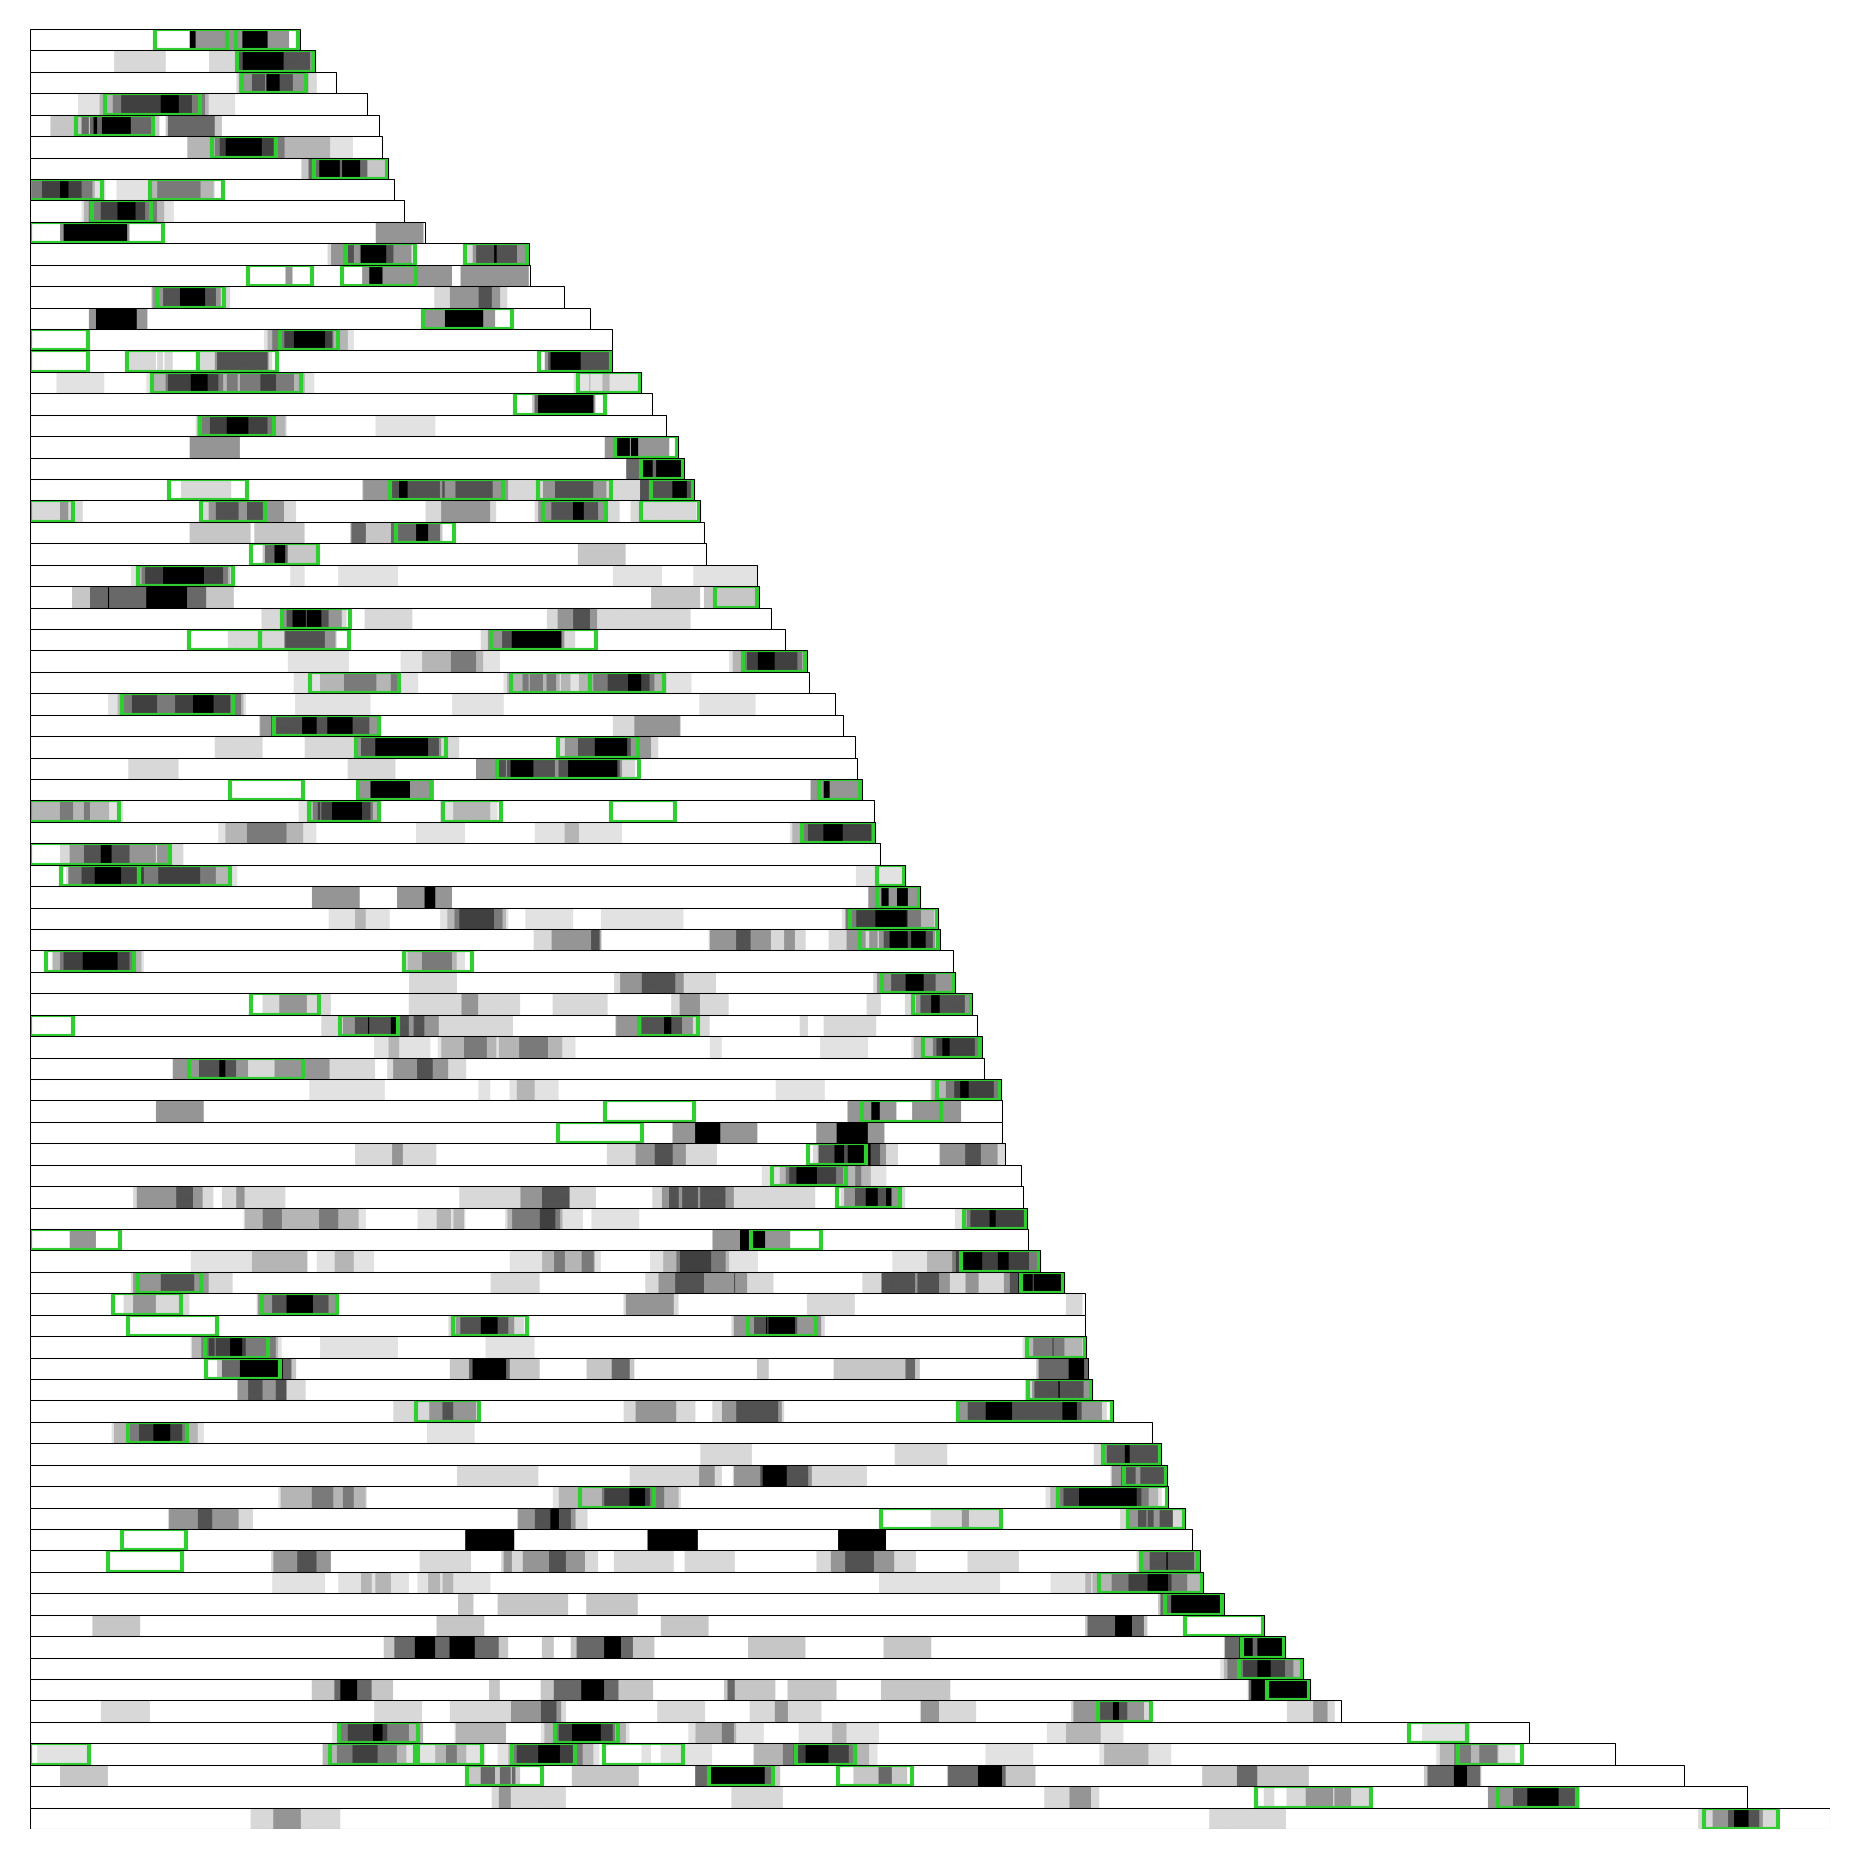

In [56]:
# Example DataFrame with a column of lists
# df = pd.DataFrame({
#     'data': [
#         [1, 2, 3],
#         [4, 5, 6],
#         [7, 8, 9]
#     ]
# })


# Extract the column of lists
data = acidic_activator_TFs['combined_preds'].tolist()

# # Find the maximum length of the lists
# max_len = max(len(row) for row in data)

# # Pad each list with np.nan (or 0) to make them all the same length
# padded_data = np.array([np.concatenate([row, [np.nan] * (max_len - len(row))]) for row in data])

fig,axs = plt.subplots(len(acidic_activator_TFs), 1, figsize = (6,6), sharex = True)

for i in range(len(axs)):
    uniprotID = acidic_activator_TFs["uniprotID"].iloc[i]

    ax = axs[i]
    # Use imshow to visualize
    axs[i].imshow(data[i][np.newaxis, :], cmap='Grays', aspect='auto', extent=[0, len(data[i]), 0, 1])  # or 'gray', 'hot', etc.
    axs[i].set_xlabel("")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    #a.colorbar()
    #plt.title('imshow of df column')
    #plt.show()

    AD_rows = known_ADs[known_ADs["uniprotID"] == uniprotID]
        # Add rectangle(s) for each interval
    for (start, end) in zip(AD_rows["Start"], AD_rows["End"]):
        width = end - start
        rect = patches.Rectangle(
            (start, 0),  # (x, y) lower-left corner
            width,
            1,  # height
            linewidth=1,
            edgecolor='limegreen',
            facecolor='none'
        )
        ax.add_patch(rect)

    rect = patches.Rectangle(
            (0, 0),  # (x, y) lower-left corner
            len(data[i]),
            1,  # height
            linewidth=0.25,
            edgecolor='black',
            facecolor='none'
        )
    ax.add_patch(rect)
    
sns.despine(left = True, bottom = True)
plt.tight_layout(pad = 0)

# Table

In [57]:
def count_overlaps(row, df2):
    # Filter df2 by matching uniprotID
    matching_rows = df2[df2['uniprotID'] == row['uniprotID']]
    
    # Count overlaps: intervals overlap if
    # start1 < end2 AND end1 > start2
    overlaps = matching_rows[((matching_rows['Start'] < row['End']) & (matching_rows['End'] > row['Start']))]
    
    return len(overlaps["predictor"].unique())


In [58]:
all_models["predictor"].value_counts()

predictor
adhunter       452
adpred         321
tada           296
paddle         224
mechanistic    104
Name: count, dtype: int64

In [59]:
known_ADs['pred_overlap_count'] = known_ADs.apply(count_overlaps, axis=1, df2=all_models)
known_ADs

,protein,uniprotID,Start,End,maximal activation,maximal Z score,maximal fragment,sequence,charge,pred_overlap_count
0,GCN4,P03069,63,142,128.273405,11.910003,A_tiles_P03069:76,NLDFDFALPQTATAPDAKTVLPIPELDDAVVESFFSSSTDSTPMFE...,-15,5
1,GAL4,P04386,832,880,44.019965,9.285866,A_tiles_P04386:828,SKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDTPPNPKK,-4,4
2,GAL4,P04386,146,199,59.660889,10.031831,A_controls-mean_GAL4,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,-10,5
3,ARG81,P05085,194,256,32.070085,8.508774,A_tiles_P05085:194,KGHVKTGILSANDGVPPTPNLLDYDWNNLNITGYEWISSELRDDAL...,-4,4
4,ARG81,P05085,69,126,13.391200,6.366012,A_tiles_P05085:65,IPQNSPATTTNLSGSVDEPQYQRRNIDFVRYDEEYVYHEDMDDELT...,-8,2
...,...,...,...,...,...,...,...,...,...,...
145,YRM1,Q12340,737,785,73.486889,10.543228,A_tiles_Q12340:733,SENASHNNETGPIETELAQTISNEFWTAYNLGWEELMSQPDYKYLFDT,-8,4
146,YRM1,Q12340,184,241,21.275056,7.501859,A_tiles_Q12340:193,PLEKTGSDILQQVCNVLPSFEQSSKIITDFFNTELETNEVSEVLDK...,-6,2
147,HAA1,Q12753,658,693,35.587427,8.764113,A_tiles_Q12753:641,DLPDTSPMSSIQTASPPSQLLTDQGFADLDNFMSS,-5,2
148,HAA1,Q12753,274,335,28.366703,8.207702,A_tiles_Q12753:282,NSRVGEVSVPLEEYIPSDIDGVGRVTDKSSLVYDWPFDESIERNFS...,-7,2


In [60]:
# all_models_no_comp = all_models[all_models["predictor"] != "mechanistic"]
# known_ADs['pred_overlap_count_no_comp'] = known_ADs.apply(count_overlaps, axis=1, df2=all_models_no_comp)
# known_ADs

In [61]:
# all_models_no_adhunter = all_models[all_models["predictor"] != "adhunter"]
# known_ADs['pred_overlap_count_no_adhunter'] = known_ADs.apply(count_overlaps, axis=1, df2=all_models_no_adhunter)
# known_ADs

In [62]:
# all_models_no_adpred = all_models[all_models["predictor"] != "adpred"]
# known_ADs['pred_overlap_count_no_adpred'] = known_ADs.apply(count_overlaps, axis=1, df2=all_models_no_adpred)
# known_ADs

In [63]:
# all_models_no_tada = all_models[all_models["predictor"] != "tada"]
# known_ADs['pred_overlap_count_no_tada'] = known_ADs.apply(count_overlaps, axis=1, df2=all_models_no_tada)
# known_ADs

In [64]:
# all_models_no_paddle = all_models[all_models["predictor"] != "paddle"]
# known_ADs['pred_overlap_count_no_paddle'] = known_ADs.apply(count_overlaps, axis=1, df2=all_models_no_paddle)
# known_ADs

In [65]:
known_ADs.max()

protein                                                            ZAP1
uniprotID                                                        Q12753
Start                                                              1397
End                                                                1459
maximal activation                                           194.492552
maximal Z score                                                12.93125
maximal fragment                                     A_tiles_Q12753:641
sequence              YSNSISNSNSNSTGNLNSSYFNSLNIDSMLDDYVSSDLLLNDDDDD...
charge                                                                3
pred_overlap_count                                                    5
dtype: object

In [67]:
max(known_ADs["pred_overlap_count"])

5

In [69]:
acidic_known_ADs['pred_overlap_count'] = acidic_known_ADs.apply(count_overlaps, axis=1, df2=all_models)
acidic_known_ADs

,protein,uniprotID,Start,End,maximal activation,maximal Z score,maximal fragment,sequence,charge,pred_overlap_count
0,GCN4,P03069,63,142,128.273405,11.910003,A_tiles_P03069:76,NLDFDFALPQTATAPDAKTVLPIPELDDAVVESFFSSSTDSTPMFE...,-15,5
1,GAL4,P04386,832,880,44.019965,9.285866,A_tiles_P04386:828,SKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDTPPNPKK,-4,4
2,GAL4,P04386,146,199,59.660889,10.031831,A_controls-mean_GAL4,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,-10,5
3,ARG81,P05085,194,256,32.070085,8.508774,A_tiles_P05085:194,KGHVKTGILSANDGVPPTPNLLDYDWNNLNITGYEWISSELRDDAL...,-4,4
4,ARG81,P05085,69,126,13.391200,6.366012,A_tiles_P05085:65,IPQNSPATTTNLSGSVDEPQYQRRNIDFVRYDEEYVYHEDMDDELT...,-8,2
...,...,...,...,...,...,...,...,...,...,...
144,YLL054C,Q12244,777,842,108.571140,11.500851,A_tiles_Q12244:790,SLDLEILEELEKLISAQEFSRNFTEDVDESLQSEIDLMNYDNEALN...,-13,5
145,YRM1,Q12340,737,785,73.486889,10.543228,A_tiles_Q12340:733,SENASHNNETGPIETELAQTISNEFWTAYNLGWEELMSQPDYKYLFDT,-8,4
146,YRM1,Q12340,184,241,21.275056,7.501859,A_tiles_Q12340:193,PLEKTGSDILQQVCNVLPSFEQSSKIITDFFNTELETNEVSEVLDK...,-6,2
147,HAA1,Q12753,658,693,35.587427,8.764113,A_tiles_Q12753:641,DLPDTSPMSSIQTASPPSQLLTDQGFADLDNFMSS,-5,2


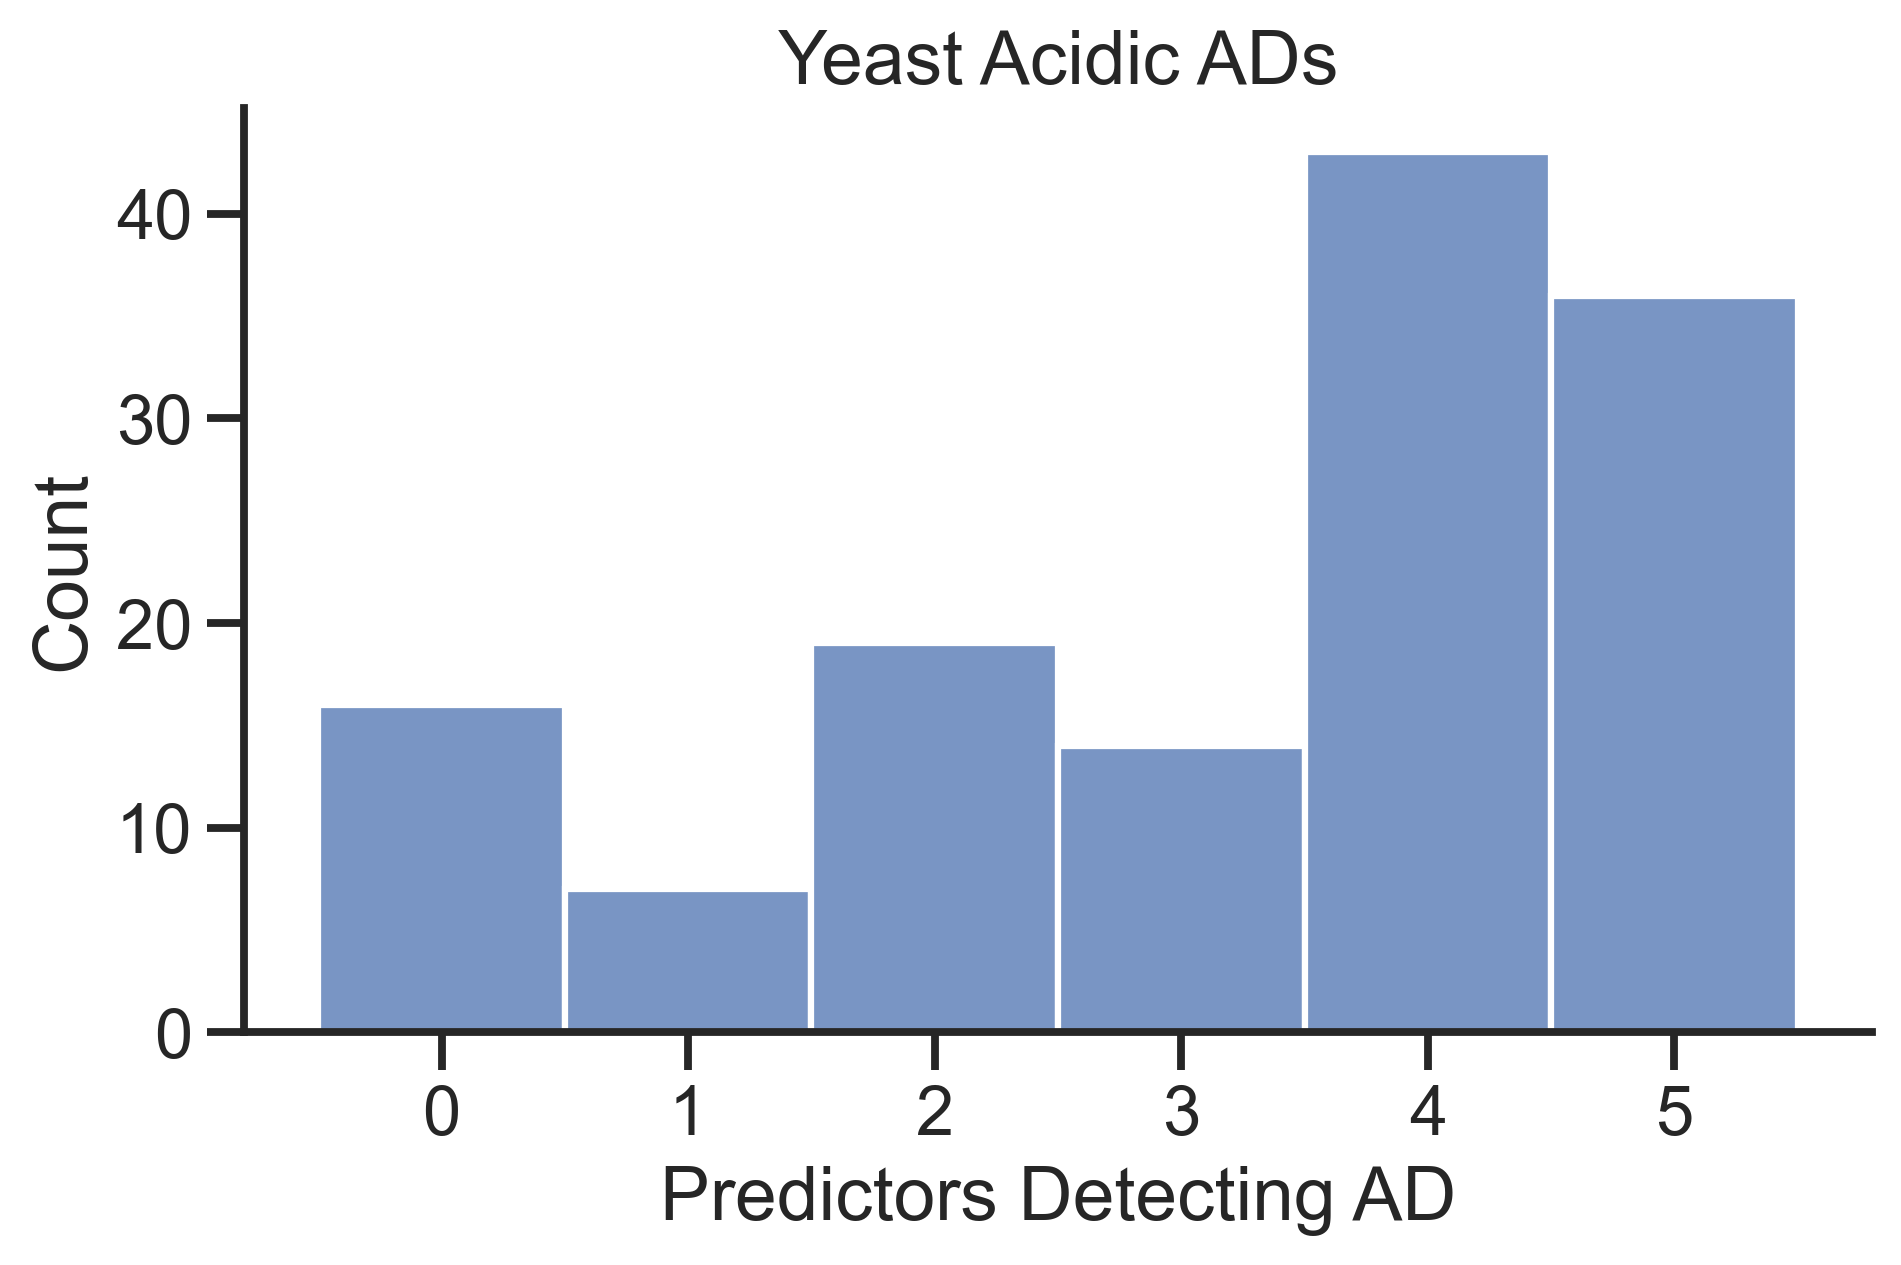

In [70]:
sns.set_context('talk')
sns.set_style('ticks')
plt.figure(figsize=(7, 4))
sns.histplot(acidic_known_ADs["pred_overlap_count"], bins = np.arange(-0.5, 6.5,1))
plt.xlabel("Predictors Detecting AD")
plt.title("Yeast Acidic ADs")
sns.despine()